## 623 Project 
#### Covid19 and Google Mobility Data Analysis


In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#### Reading datasets; 
We have gathered different datasets from different sources which is mentioned for each one before reading. PLease note that after reading all datasets we will declare which variables we are going to use:

### DATASET 1
#### Daily new cases and daily deaths per state in U.S.
Source: https://github.com/nytimes/covid-19-data

In [631]:
covid19_raw = pd.read_csv("us-states.csv")
covid19_raw.head(2)


,date,state,fips,cases,deaths,daily case,daily death
0,7/20/2020,Alabama,1,68891,1291,1880,4
1,7/19/2020,Alabama,1,67011,1287,1777,1


#### Cleaning Dataset 1

In [632]:
## Cause we dont need fips, we remove it!
covid19 = covid19_raw.drop(columns=['fips'])
covid19.head(2)

,date,state,cases,deaths,daily case,daily death
0,7/20/2020,Alabama,68891,1291,1880,4
1,7/19/2020,Alabama,67011,1287,1777,1


In [633]:
## Since we also do not need very first days of coronavirus spreading, we remove rows of data before the February 15.
## Note that February 15 is the last day that google mobility data has been extracted from!
out_indexes = covid19[(covid19['date'] < '2020-02-15') ].index
covid19.drop(out_indexes, inplace=True)
# convert the 'date' column to datetime format 
covid19['date'] = covid19['date'].astype('datetime64[ns]')
len(covid19.index)


7474

### DATASET 2
#### Daily tests taken per state.
Source: https://covidtracking.com/data/download

In [635]:
tests_raw = pd.read_csv("us-daily-tests.csv")
tests_raw.head(2)


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200720,AK,2414.0,173172.0,NaN,29.0,NaN,NaN,NaN,0.0,...,175586,0,0,982ac1a1537b9b7a5d2dd768e419cece11dfe669,0,0,0,0,0,NaN
1,20200720,AL,68891.0,524897.0,NaN,1563.0,8368.0,NaN,994.0,NaN,...,593788,4,586,78b0f0cdb400a84b5052f80e597bc11138f5848d,0,0,0,0,0,NaN


#### Cleaning Dataset 2

In [637]:
## Correcting date format
tests_raw['date'] =  pd.to_datetime(tests_raw['date'], format='%Y%m%d')
tests_raw.head(2)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-07-20,AK,2414.0,173172.0,NaN,29.0,NaN,NaN,NaN,0.0,...,175586,0,0,982ac1a1537b9b7a5d2dd768e419cece11dfe669,0,0,0,0,0,NaN
1,2020-07-20,AL,68891.0,524897.0,NaN,1563.0,8368.0,NaN,994.0,NaN,...,593788,4,586,78b0f0cdb400a84b5052f80e597bc11138f5848d,0,0,0,0,0,NaN


In [654]:
## Changing Abbrevation into full name for each state:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming' : 'WA'
}
abbrev = dict((y,x) for x,y in us_state_abbrev.items())
tests = tests_raw.replace({'state': abbrev})
tests.describe().to_csv('tests_des.csv')
tests.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-07-20,Alaska,2414.0,173172.0,NaN,29.0,NaN,NaN,NaN,0.0,...,175586,0,0,982ac1a1537b9b7a5d2dd768e419cece11dfe669,0,0,0,0,0,NaN
1,2020-07-20,Alabama,68891.0,524897.0,NaN,1563.0,8368.0,NaN,994.0,NaN,...,593788,4,586,78b0f0cdb400a84b5052f80e597bc11138f5848d,0,0,0,0,0,NaN
2,2020-07-20,Arkansas,33927.0,398889.0,NaN,471.0,2202.0,NaN,NaN,111.0,...,432816,0,25,3bb85a05440526c23d60b70ad3388d236332589c,0,0,0,0,0,NaN
3,2020-07-20,American Samoa,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,eb1949a094a8c4c95f33a9c6db8d407e917f5bdb,0,0,0,0,0,NaN
4,2020-07-20,Arizona,145183.0,648340.0,NaN,3084.0,6698.0,886.0,NaN,622.0,...,793523,23,66,181888e74b302a4e4e3e90a0771e139657f9f0fe,0,0,0,0,0,NaN


In [638]:
## Keep needed columns
tests = tests[['date','state','total']]
## changind date format
tests['date'] = tests['date'].astype('datetime64[ns]')
## Removing data befor February 15
out_indexes = tests[(tests['date'] < '2020-02-15') ].index
tests.drop(out_indexes, inplace=True)
tests.head(2)
# len(tests.index)

,date,state,total
0,2020-07-20,Alaska,175586
1,2020-07-20,Alabama,593788


### DATASET 3
#### Google Mobility Report Data
Source: https://www.google.com/covid19/mobility/

In [538]:
mobility_raw = pd.read_csv("Global_Mobility_Report.csv")


C:\Users\hanif\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [539]:
mobility_raw.shape

(1365701, 14)

In [540]:
mobility_raw.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [541]:
    mobility_raw.isna().sum()

country_region_code                                      1273
country_region                                              0
sub_region_1                                            31218
sub_region_2                                           323288
metro_area                                            1356488
iso_3166_2_code                                       1043367
census_fips_code                                       938526
date                                                        0
retail_and_recreation_percent_change_from_baseline     468243
grocery_and_pharmacy_percent_change_from_baseline      496436
parks_percent_change_from_baseline                     709558
transit_stations_percent_change_from_baseline          688560
workplaces_percent_change_from_baseline                 60189
residential_percent_change_from_baseline               670628
dtype: int64

In [542]:
mobility_raw.loc[1000]

country_region_code                                                     AE
country_region                                        United Arab Emirates
sub_region_1                                                       Sharjah
sub_region_2                                                           NaN
metro_area                                                             NaN
iso_3166_2_code                                                      AE-SH
census_fips_code                                                       NaN
date                                                            2020-03-02
retail_and_recreation_percent_change_from_baseline                       3
grocery_and_pharmacy_percent_change_from_baseline                        4
parks_percent_change_from_baseline                                       5
transit_stations_percent_change_from_baseline                           -3
workplaces_percent_change_from_baseline                                  5
residential_percent_chang

In [651]:
mobility_raw.describe().to_csv('mobility_raw_des.csv')
mobility_raw.describe()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,427175.000000,897458.000000,869265.000000,656143.000000,677141.00000,1.305512e+06,695073.000000
mean,30342.242491,-26.535888,-7.198984,-11.624175,-30.04922,-2.222394e+01,10.753341
std,15298.178826,30.630203,23.955078,59.270637,31.78071,2.164299e+01,9.227836
min,1001.000000,-100.000000,-100.000000,-100.000000,-100.00000,-9.500000e+01,-25.000000
25%,18109.000000,-49.000000,-18.000000,-51.000000,-55.00000,-3.600000e+01,3.000000
50%,29105.000000,-23.000000,-3.000000,-19.000000,-30.00000,-2.200000e+01,10.000000
75%,45057.000000,-2.000000,7.000000,11.000000,-5.00000,-5.000000e+00,16.000000
max,56045.000000,313.000000,379.000000,1073.000000,497.00000,2.580000e+02,57.000000


#### Cleaning Dataset 3
We Only need rows of U.S. data, plus removing nonsense columns and dealing with null missing values and ...

In [639]:
mobility = mobility_raw[mobility_raw['country_region_code'] == 'US']
mobility = mobility[mobility.sub_region_2.isnull()]
mobility.dropna(subset=['sub_region_1'], inplace = True)

## Changing columns' names because they were too long to use!
mobility = mobility.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail',
                                            'grocery_and_pharmacy_percent_change_from_baseline': 'grocery',
                                           'parks_percent_change_from_baseline': 'parks',
                                           'transit_stations_percent_change_from_baseline': 'transit',
                                           'workplaces_percent_change_from_baseline': 'workplace',
                                           'residential_percent_change_from_baseline': 'residential',
                                           'sub_region_1': 'state'})
## Changing format of date
mobility['date'] = mobility['date'].astype('datetime64[ns]')
## Dropping unnecessary columns
mobility = mobility.drop(columns=['iso_3166_2_code','census_fips_code','sub_region_2','metro_area','country_region'])
# len(mobility.index)
mobility.tail(2)

,country_region_code,state,date,retail,grocery,parks,transit,workplace,residential
1343433,US,Wyoming,2020-07-26,17.0,35.0,341.0,50.0,-9.0,-2.0
1343434,US,Wyoming,2020-07-27,18.0,31.0,334.0,40.0,-25.0,3.0


In [640]:
mobility.isna().sum()

country_region_code     0
state                   0
date                    0
retail                  0
grocery                 0
parks                  52
transit                 0
workplace               0
residential             0
dtype: int64

In [646]:
mobility.describe()

,retail,grocery,parks,transit,workplace,residential
count,8364.000000,8364.000000,8312.000000,8364.000000,8364.000000,8364.000000
mean,-17.284912,-0.757054,57.554139,-21.092539,-28.405428,9.611549
std,19.457899,12.433048,80.348222,24.230203,17.922903,7.283131
min,-77.000000,-62.000000,-77.000000,-82.000000,-78.000000,-5.000000
25%,-33.000000,-8.000000,2.000000,-40.000000,-41.000000,3.000000
50%,-15.000000,0.000000,35.000000,-22.000000,-32.000000,10.000000
75%,-1.000000,7.000000,96.000000,0.000000,-14.000000,15.000000
max,33.000000,51.000000,502.000000,62.000000,18.000000,33.000000


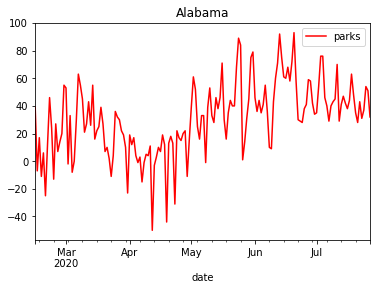

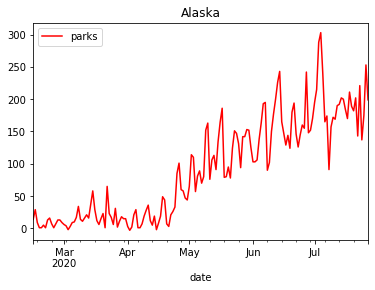

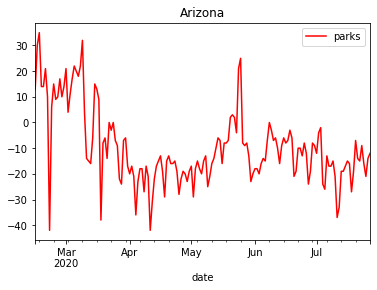

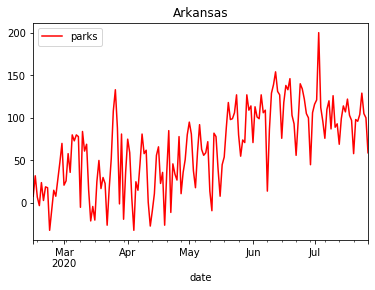

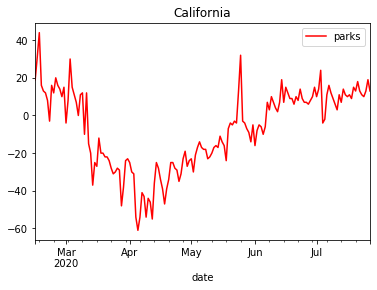

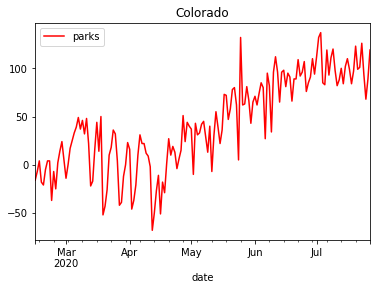

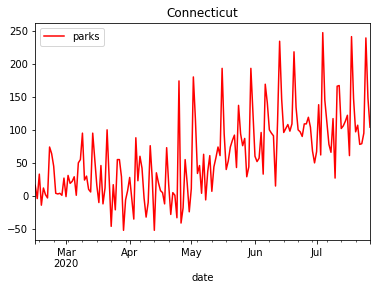

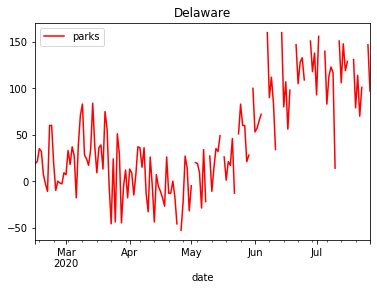

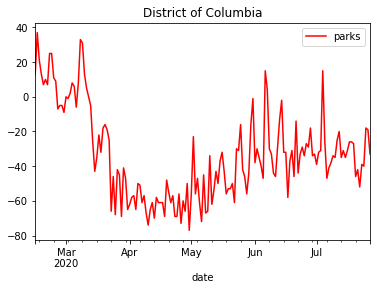

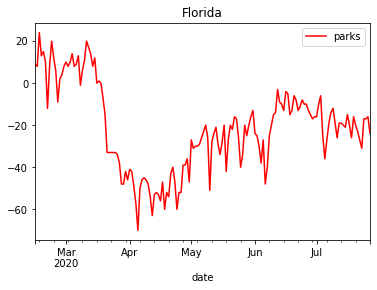

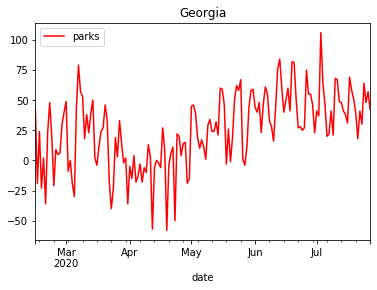

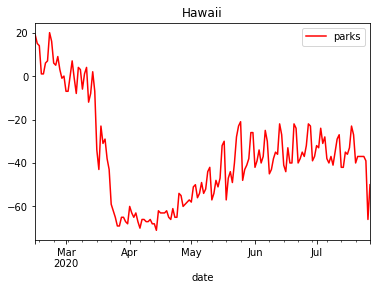

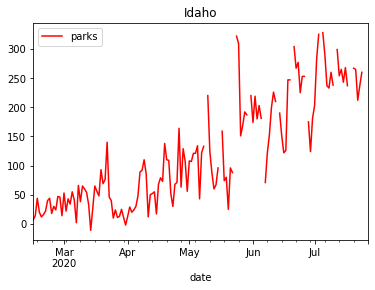

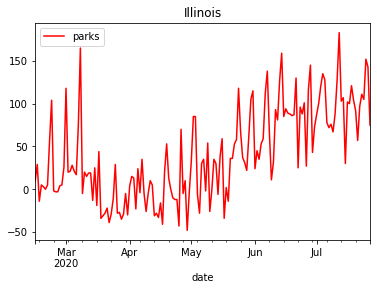

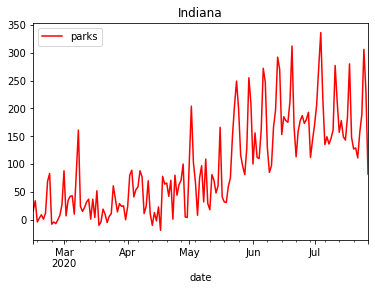

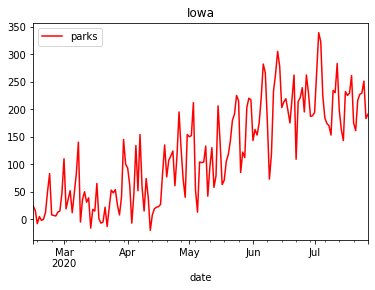

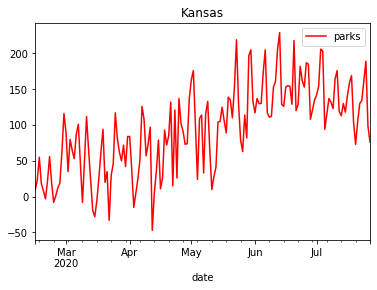

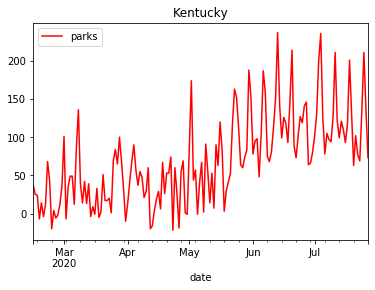

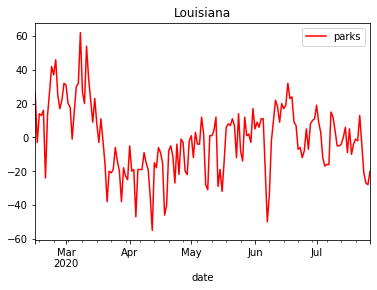

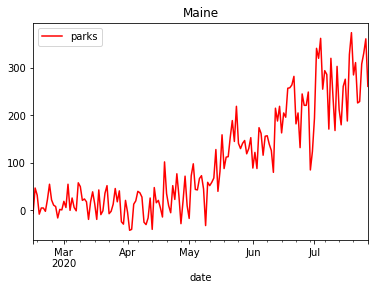

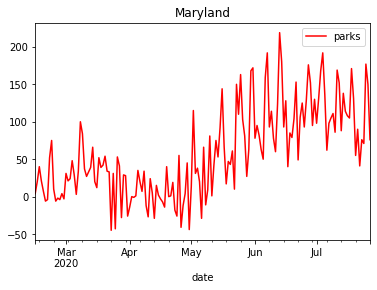

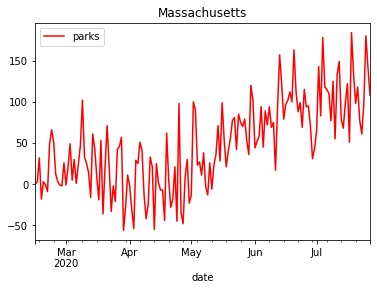

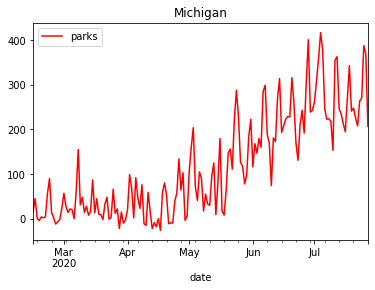

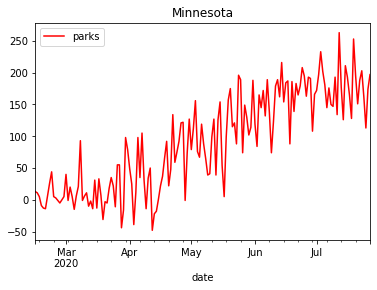

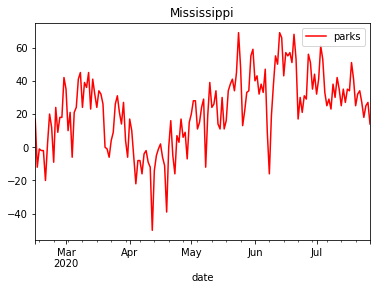

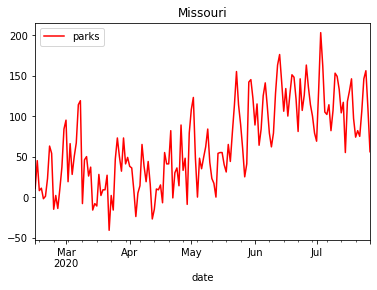

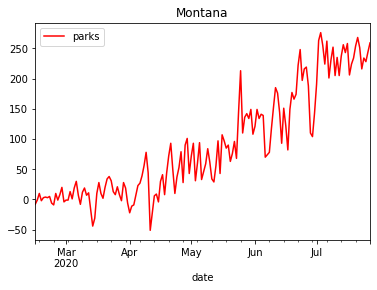

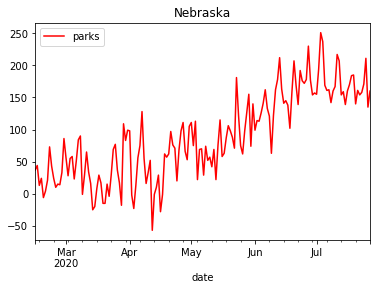

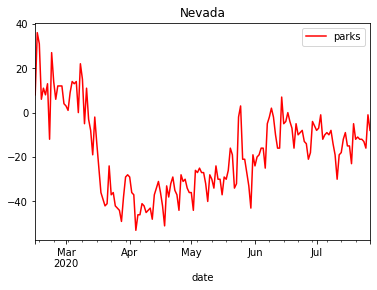

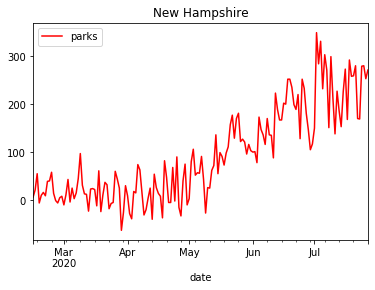

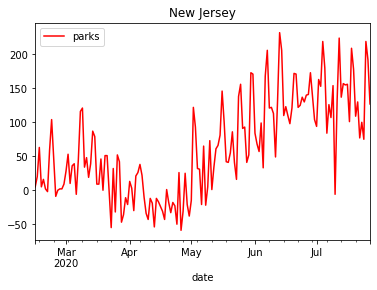

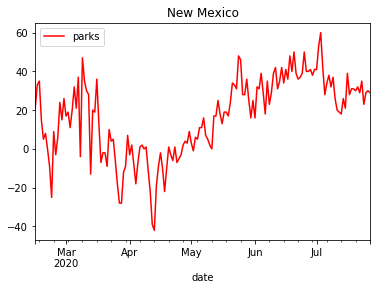

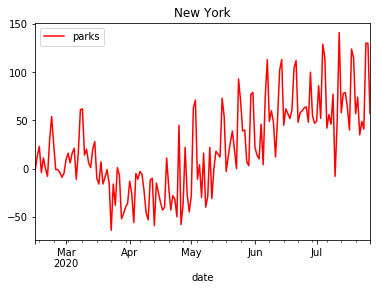

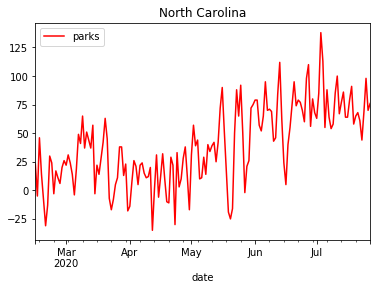

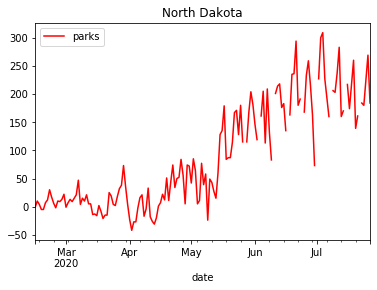

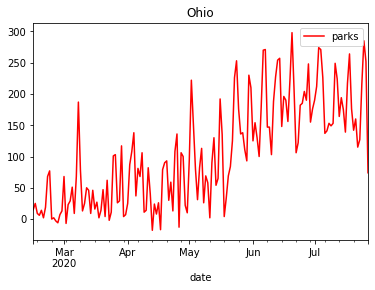

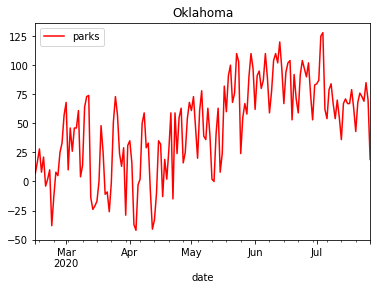

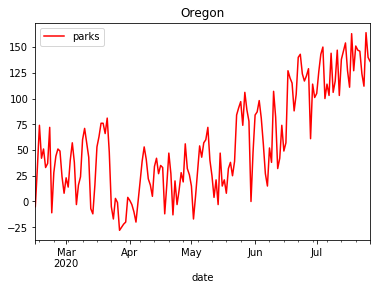

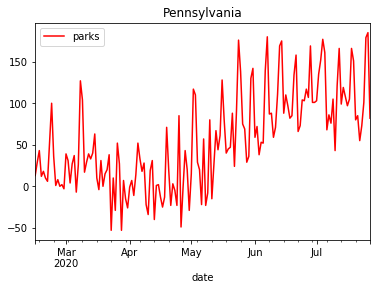

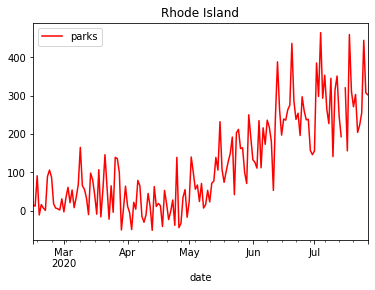

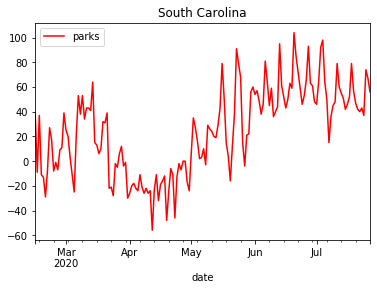

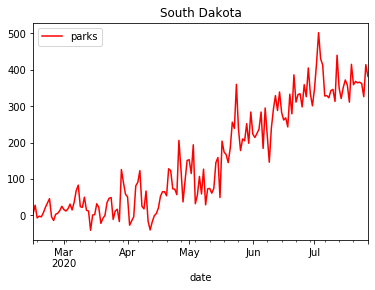

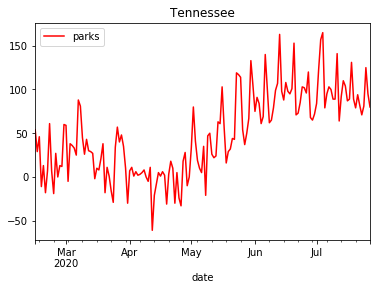

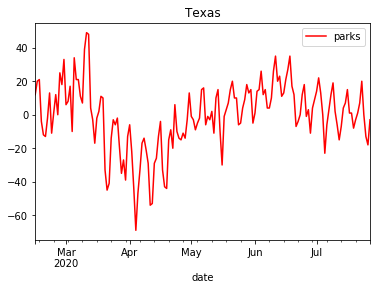

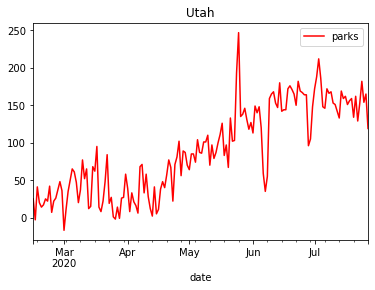

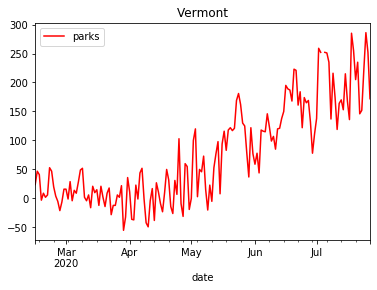

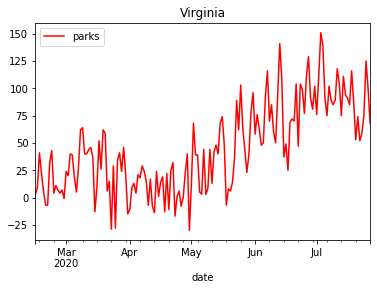

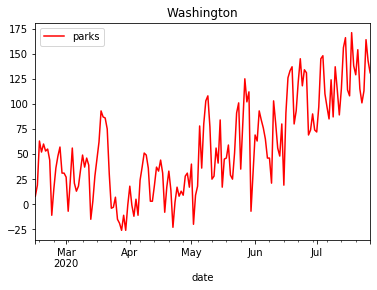

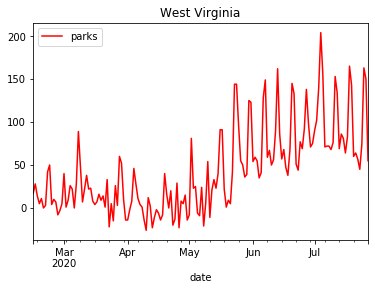

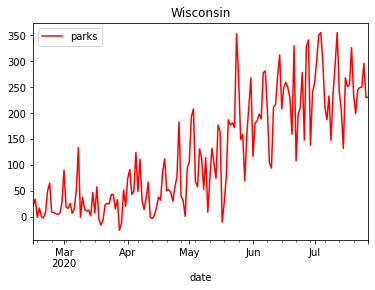

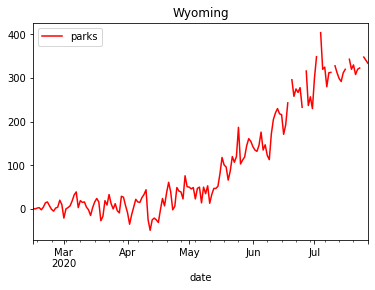

In [547]:
import matplotlib.pyplot as plt

# plot = plt.plot(mobility[mobility['state']== ['Alabama']]['parks'] ,mobility['date'])

# plot.show()
states_unique = mobility.state.unique()
for i in states_unique:
    plotting_df = mobility[mobility['state']== i]
    plotting_df.plot(kind='line', x='date', y='parks', color='red')
    plt.title(i)
    plt.show()

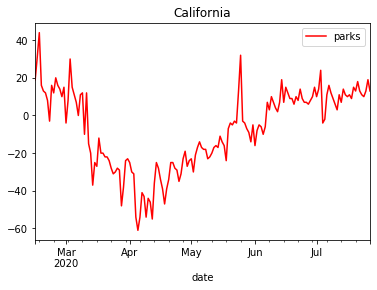

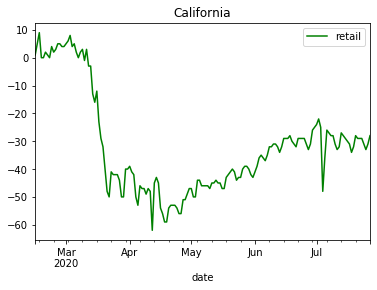

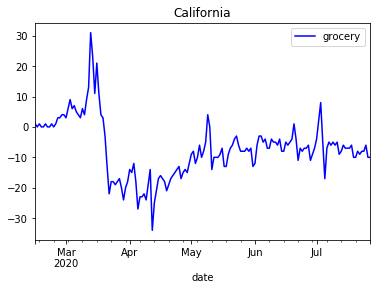

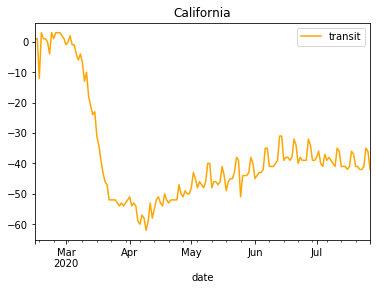

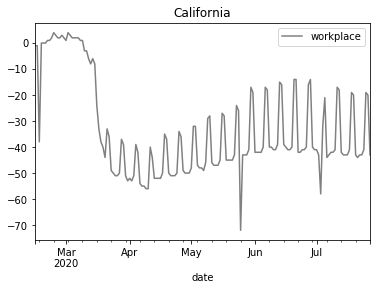

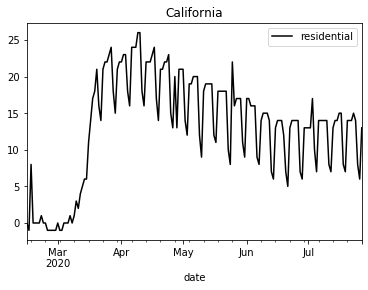

In [548]:
states_unique = mobility.state.unique()

plotting_df = mobility[mobility['state']== 'California']
plotting_df.plot(kind='line', x='date', y='parks', color='red')
plt.title('California')
plt.savefig('park.jpeg')
plt.show()

plotting_df = mobility[mobility['state']== 'California']
plotting_df.plot(kind='line', x='date', y='retail', color='green')
plt.title('California')
plt.savefig('retail.jpeg')
plt.show()

plotting_df = mobility[mobility['state']== 'California']
plotting_df.plot(kind='line', x='date', y='grocery', color='blue')
plt.title('California')
plt.savefig('grocery.jpeg')
plt.show()

plotting_df = mobility[mobility['state']== 'California']
plotting_df.plot(kind='line', x='date', y='transit', color='orange')
plt.title('California')
plt.savefig('transit.jpeg')
plt.show()

plotting_df = mobility[mobility['state']== 'California']
plotting_df.plot(kind='line', x='date', y='workplace', color='grey')
plt.title('California')
plt.savefig('workplace.jpeg')
plt.show()

plotting_df = mobility[mobility['state']== 'California']
plotting_df.plot(kind='line', x='date', y='residential', color='black')
plt.title('California')
plt.savefig('residential.jpeg')
plt.show()


### DATASET 4
#### U.S. Governors Party


In [656]:
governors = pd.read_csv("Governors.csv")
#len(governors.index)
governors.describe().to_csv('governers.csv')
governors.head(1)

,state,governor,party,data entered,state health uninsured
0,Alabama,Kay Ivey,Republican,10-Apr-17,10.0


### Now data is cleaned and we need to concatenate required columns to build supervised model:


In [550]:
df1 = pd.merge(covid19, mobility, on = ["date","state"])
df2 = pd.merge(df1, tests, on = ["date","state"])
df_main = pd.merge(df1, tests, on = ["date","state"])
# df2.head()

#### Add lag data for timeseries analysis

In [551]:
lag = -15
df2["lagcases"] = df2["daily case"].shift(lag)
df2["lagretail"] = df2["retail"].shift(lag)
df2["laggrocery"] = df2["grocery"].shift(lag)
df2["lagparks"] = df2["parks"].shift(lag)
df2["lagtransit"] = df2["transit"].shift(lag)
df2["lagworkplace"] = df2["workplace"].shift(lag)
df2["lagresidential"] = df2["residential"].shift(lag)

df2 = df2[0:lag]
# df2 = df2[df2['state']== 'Florida']
df2.tail()


,date,state,cases,deaths,daily case,daily death,country_region_code,retail,grocery,parks,...,workplace,residential,total,lagcases,lagretail,laggrocery,lagparks,lagtransit,lagworkplace,lagresidential
6757,2020-03-30,Wyoming,96,0,8,0,US,-31.0,-5.0,27.0,...,-35.0,12.0,80962,0.0,-4.0,17.0,3.0,0.0,-3.0,2.0
6758,2020-03-29,Wyoming,88,0,3,0,US,-37.0,-13.0,29.0,...,-29.0,8.0,75812,1.0,-7.0,20.0,-15.0,8.0,-2.0,3.0
6759,2020-03-28,Wyoming,85,0,11,0,US,-44.0,-12.0,-9.0,...,-28.0,11.0,73979,1.0,-3.0,29.0,-2.0,3.0,-3.0,3.0
6760,2020-03-27,Wyoming,74,0,18,0,US,-42.0,-8.0,-4.0,...,-35.0,17.0,71378,0.0,6.0,26.0,4.0,10.0,0.0,0.0
6761,2020-03-26,Wyoming,56,0,7,0,US,-36.0,-7.0,12.0,...,-36.0,15.0,67018,1.0,8.0,16.0,16.0,6.0,2.0,-1.0


In [648]:
df2.describe().to_csv('df2_des.csv')

In [552]:
from sklearn.linear_model import LinearRegression

In [553]:
# pip install git+https://github.com/statsmodels/statsmodels

In [554]:
model = LinearRegression()

In [555]:
# x = df2["retail","grocery","parks","transit","workplace","residential","total","lagcases"]
#x = np.array(list(zip(df2["retail"],df2["lagcases"],df2["parks"],df2["grocery"],df2["transit"],df2["workplace"],df2["residential"],)))

x = np.array(list(zip(df2["lagretail"],df2["lagcases"],df2["lagparks"],df2["laggrocery"],df2["lagtransit"],df2["lagworkplace"],df2["lagresidential"],)))

def pad(data):
    bad_indexes = np.isnan(data)
    good_indexes = np.logical_not(bad_indexes)
    good_data = data[good_indexes]
    interpolated = np.interp(bad_indexes.nonzero()[0], good_indexes.nonzero()[0], good_data)
    data[bad_indexes] = interpolated
    return data



A = np.apply_along_axis(pad, 0, x)
print(A)

model.fit(x, df2['daily case'])

[[-1.800e+01  1.091e+03  4.600e+01 ...  1.100e+01 -2.100e+01  4.000e+00]
 [-3.500e+01  9.970e+02  7.600e+01 ... -9.000e+00 -2.800e+01  4.000e+00]
 [-3.000e+00  1.754e+03  7.600e+01 ...  0.000e+00 -5.500e+01  1.400e+01]
 ...
 [-3.000e+00  1.000e+00 -2.000e+00 ...  3.000e+00 -3.000e+00  3.000e+00]
 [ 6.000e+00  0.000e+00  4.000e+00 ...  1.000e+01  0.000e+00  0.000e+00]
 [ 8.000e+00  1.000e+00  1.600e+01 ...  6.000e+00  2.000e+00 -1.000e+00]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [556]:
model.score(x,df2['daily case'])

0.343091561263437

In [557]:
model.coef_

array([ 1.77145143,  0.55823056, -1.2885836 ,  9.82779763, -6.69801059,
        5.34294627, 10.49854559])

## Building iteration over states for fitting regression model on each state:



In [559]:
group = df2.state.unique()
lst = []
lst_coef = []
for i in group:
    dftest = df2[df2['state']== i]
    dftest.dropna()
    x = np.array(list(zip(dftest["lagretail"],dftest["lagcases"],
                          dftest["lagparks"],dftest["laggrocery"],
                          dftest["lagtransit"],dftest["lagworkplace"],
                          dftest["lagresidential"],)))
    A = np.apply_along_axis(pad, 0, x)
    model.fit(A, dftest['daily case'])
    lst.append(model.score(A, dftest['daily case']))
    lst_coef.append(model.coef_)
# print(lst)
# print(lst_coef[0])
# print(len(group))

In [560]:
coeficients = pd.DataFrame(lst_coef)
rsquared_states = pd.DataFrame({'state': group,
     'Rsquared': lst
    })
df_evaluation0 = pd.concat([rsquared_states, coeficients], axis = 1)
df_evaluation = df_evaluation0.rename(columns={0: 'retail',
                                            1: 'lagcases',
                                           2: 'parks',
                                           3: 'grocery',
                                           4: 'transit',
                                           5: 'workplace',
                                           6: 'residential'})   
#df_evaluation = df_evaluation[df_evaluation['Rsquared']>0.65]
df_evaluation.head(1)

,state,Rsquared,retail,lagcases,parks,grocery,transit,workplace,residential
0,Alabama,0.775389,-3.492571,0.892756,-3.339714,-7.743615,24.951761,-17.135525,-27.705226


In [561]:
df_evaluation = df_evaluation[df_evaluation['Rsquared']>0]
df_evaluation.head(1)

,state,Rsquared,retail,lagcases,parks,grocery,transit,workplace,residential
0,Alabama,0.775389,-3.492571,0.892756,-3.339714,-7.743615,24.951761,-17.135525,-27.705226


## K-Means Clustering
### Here we are going to make clustering based on two variables: deaths and daily cases

In [562]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [563]:
df_main.head(1)

,date,state,cases,deaths,daily case,daily death,country_region_code,retail,grocery,parks,transit,workplace,residential,total
0,2020-07-20,Alabama,68891,1291,1880,4,US,-9.0,-1.0,35.0,-1.0,-31.0,8.0,593788


In [564]:
states_pop = pd.read_csv("datasets_28951_36892_State Populations.csv")
states_pop.head(1)

,state,population
0,California,39776830


In [565]:
kmeans_df = df_main.filter(['date','state','cases', 'deaths','total'], axis=1)
kmeans_df.head(1)

,date,state,cases,deaths,total
0,2020-07-20,Alabama,68891,1291,593788


In [566]:
specified_date = '2020-07-15'
Xaxe = 'cases per million'
Yaxe = 'state health uninsured'
monthly_data_filtered = kmeans_df[kmeans_df["state"] != 'Wyoming' ]
monthly_data = monthly_data_filtered[monthly_data_filtered["date"] == specified_date ]
monthly_data.head(1)

,date,state,cases,deaths,total
5,2020-07-15,Alabama,59067,1211,541049


In [567]:
monthly_data_pop = pd.merge(states_pop, monthly_data, on = ["state"])
monthly_data_pop = pd.merge(monthly_data_pop, governors, on = ["state"])
monthly_data_pop["cases per million"] = (monthly_data_pop["cases"]/monthly_data_pop["population"])*1000000
monthly_data_pop["deaths per million"] = (monthly_data_pop["deaths"]/monthly_data_pop["population"])*1000000
monthly_data_pop["tests per million"] = (monthly_data_pop["total"]/monthly_data_pop["population"])*1000000
 
monthly_data_pop.head(1)

,state,population,date,cases,deaths,total,governor,party,data entered,state health uninsured,cases per million,deaths per million,tests per million
0,California,39776830,2020-07-15,355497,7368,5793276,Gavin Newsom,Democratic,2019,7.2,8937.288366,185.233464,145644.487004


In [568]:

X = monthly_data_pop.filter([Xaxe,Yaxe], axis=1)

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
centroids = kmeans.cluster_centers_
# labels = kmeans.labels_
# labels
centroids

array([[1.17060901e+04, 9.55625000e+00],
       [1.82756943e+04, 6.38333333e+00],
       [2.80496685e+03, 6.85555556e+00],
       [7.40629816e+03, 8.22941176e+00]])

In [569]:
keamns1_labels = kmeans.labels_

temp0 = pd.DataFrame({'state': monthly_data_pop['state'], 'cluster group': keamns1_labels})
clustering_0_data = pd.merge(temp0, governors, on = ["state"])
#clustering_0_data.head()
clustering_0_data.to_csv(specified_date+Xaxe+Yaxe+'.csv')
## to see which states are included in a particular cluster
#clustering_0_data[clustering_0_data['cluster group']==3].head(40)

In [570]:
pd.DataFrame(centroids).to_csv(specified_date+Xaxe+Yaxe+'centers'+'.csv')
#type(centroids)

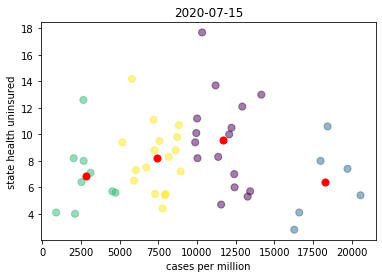

In [571]:
plt.scatter(X[Xaxe], X[Yaxe], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel(Xaxe)
plt.ylabel(Yaxe)
plt.title(specified_date)
plt.savefig(specified_date+Xaxe+Yaxe+'.jpeg')
plt.show()

## Plot Clusters and identify political party of governour of each states in clusters

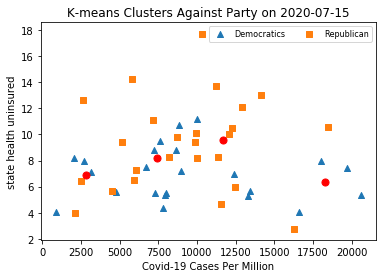

In [572]:
x = X[Xaxe].to_numpy()
y = X[Yaxe].to_numpy()

classes = monthly_data_pop['party'].to_numpy()
fig, ax = plt.subplots()

dem = ax.scatter(x[classes=='Democratic'],y[classes=='Democratic'], marker='^')
rep = ax.scatter(x[classes=='Republican'],y[classes=='Republican'], marker='s')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.legend((dem, rep),
           ('Democratics', 'Republican'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.title('K-means Clusters Against Party on ' +specified_date)
plt.xlabel('Covid-19 Cases Per Million')
plt.ylabel(Yaxe)
plt.savefig(specified_date+Xaxe+Yaxe+' party'+'.jpeg')
plt.show()

## Clustring Time series of Daily new Cases 

In [573]:
data_pop = pd.merge(states_pop, df_main, on = ["state"])
#monthly_data_pop = pd.merge(df3, governors, on = ["state"])
data_pop["cases per million"] = (data_pop["cases"]/data_pop["population"])*1000000
data_pop["deaths per million"] = (data_pop["deaths"]/data_pop["population"])*1000000
 


In [574]:
# data_pop.head()

In [575]:
X = df2.filter(["state","date","daily case"], axis=1)
X_sort = X.sort_values(by = 'date')
X_sort.head()
#kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#centroids = kmeans.cluster_centers_

,state,date,daily case
5424,Rhode Island,2020-03-01,2
5423,Rhode Island,2020-03-02,0
5422,Rhode Island,2020-03-03,0
1350,Florida,2020-03-04,0
4604,North Carolina,2020-03-04,0


In [576]:
#X_new = X_sort.set_index(['state',X_sort.groupby('state').cumcount()])['cases per million'].unstack()
#X_new = X_sort.set_index(['state'],['date'])['cases per million'].unstack(fill_value = 0 )
X_new = pd.pivot_table(X_sort, values = 'daily case', index=['state'], columns = 'date').reset_index()

In [643]:
X_new[:5]

date,state,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,...,2020-07-11 00:00:00,2020-07-12 00:00:00,2020-07-13 00:00:00,2020-07-14 00:00:00,2020-07-15 00:00:00,2020-07-16 00:00:00,2020-07-17 00:00:00,2020-07-18 00:00:00,2020-07-19 00:00:00,2020-07-20 00:00:00
0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1439.0,1640.0,1958.0,1710.0,1812.0,2021.0,2003.0,2143.0,1777.0,1880.0
1,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,77.0,116.0,71.0,54.0,61.0,76.0,49.0,74.0,118.0,137.0
2,Arizona,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,...,3044.0,2488.0,1438.0,4209.0,3285.0,3319.0,3845.0,2758.0,2311.0,1676.0
3,Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1061.0,503.0,572.0,794.0,564.0,817.0,648.0,771.0,695.0,699.0
4,California,0.0,0.0,0.0,10.0,12.0,14.0,19.0,12.0,60.0,...,8525.0,7646.0,8530.0,10387.0,8904.0,9264.0,10161.0,8272.0,8266.0,8735.0


In [621]:
X_new = X_new.fillna(0)
NOfClusters = 8
kmeans = KMeans(n_clusters=NOfClusters, random_state=0).fit(X_new.iloc[:, 2:])
centroids = kmeans.cluster_centers_

# plt.scatter(X['cases per million'], X['state health uninsured'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
# plt.show()

In [622]:
# X_new.loc[0]['state']

In [623]:
labels = kmeans.labels_
type(labels)

numpy.ndarray

In [630]:

labels = kmeans.labels_

temp = pd.DataFrame({'state': X_new['state'], 'cluster group': labels})
clustering_data = pd.merge(temp, governors, on = ["state"]) 
clustering_data.to_csv('finalcluster.csv')
        

In [625]:
clustering_data

,state,cluster group,governor,party,data entered,state health uninsured
0,Alabama,7,Kay Ivey,Republican,10-Apr-17,10.0
1,Alaska,3,Mike Dunleavy,Republican,3-Dec-18,12.6
2,Arizona,6,Doug Ducey,Republican,5-Jan-15,10.6
3,Arkansas,3,Asa Hutchinson,Republican,13-Jan-15,8.2
4,California,1,Gavin Newsom,Democratic,2019,7.2
5,Colorado,3,Jared Polis,Democratic,2019,7.5
6,Connecticut,0,Ned Lamont,Democratic,2019,5.3
7,Delaware,3,John C. Carney Jr.,Democratic,17-Jan-17,5.7
8,Florida,4,Ron DeSantis,Republican,8-Jan-19,13.0
9,Georgia,6,Brian Kemp,Republican,14-Jan-19,13.7


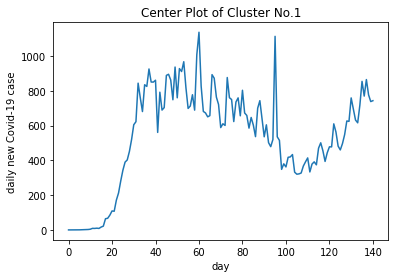

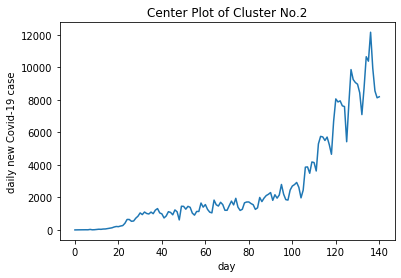

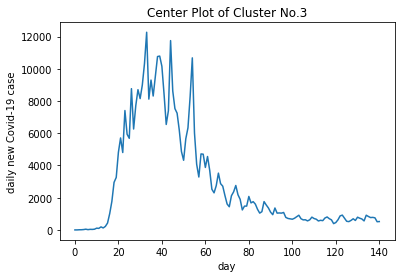

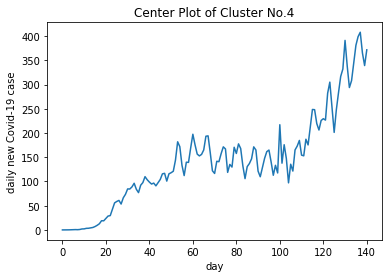

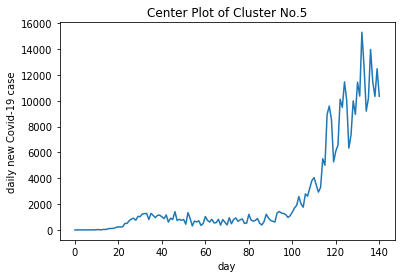

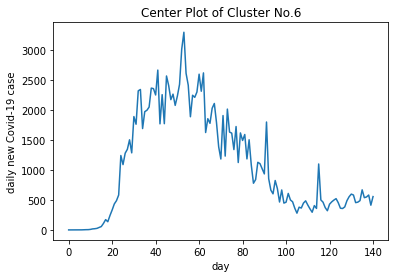

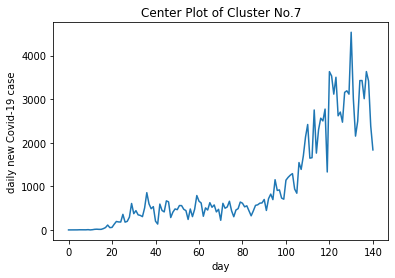

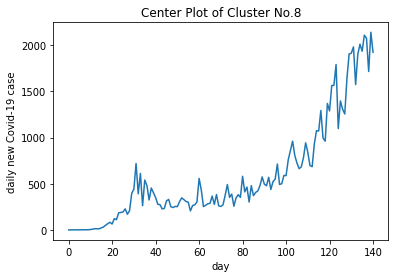

In [629]:
# print(centroids[0])
for i in range(NOfClusters ):
    plt.plot(centroids[i])
    plt.xlabel('day')
    plt.ylabel('daily new Covid-19 case')
    plt.title('Center Plot of Cluster No.' + str(i+1))
    plt.savefig('clusterNo.'+str(i+1)+'.jpeg')
    plt.show()
